# Using Telen VanBarel construction to solve for roots.

In [1]:
#Local imports
import TVB_Method.root_finder as rf
import TVB_Method.cheb_class as Cheb

#python imports
from matplotlib import pyplot as plt
import numpy as np
from scipy.io import loadmat


In [2]:
# Enter the desired dim and degree.
deg = 7
dim = 3 # number of polys should equal degree so that the zero locus is 
        # discrete. (with probability 1)

# Create random Chebyshev polys of the desired the degree and dim.
polys = Cheb.polyList(deg,dim, 'random')

#find the roots
%time zeros = rf.roots(polys)

rf.check_zeros(zeros,polys,tol=1e-8)

CPU times: user 2.02 s, sys: 148 ms, total: 2.17 s
Wall time: 1.48 s
274 zeros are correct to 1e-08, out of 343 total zeros.
69 are bad, but 69 of these were not real or out of range (expected to be bad).
0 might be lost
0 seem to be lost after newton polishing
Differences between the 'bad' inrange zeros and the polished ones are []


In [5]:
# Enter the desired dim and degree.
deg = 10
dim = 3 # number of polys should equal degree so that the zero locus is 
        # discrete. (with probability 1)

# Create random Chebyshev polys of the desired the degree and dim.
polys = Cheb.polyList(deg,dim, 'random')

#find the roots
%time zeros = rf.roots(polys)

rf.check_zeros(zeros,polys,tol=1e-8)

CPU times: user 31.5 s, sys: 1.27 s, total: 32.7 s
Wall time: 18.7 s
632 zeros are correct to 1e-08, out of 1000 total zeros.
368 are bad, but 368 of these were not real or out of range (expected to be bad).
0 might be lost
0 seem to be lost after newton polishing
Differences between the 'bad' inrange zeros and the polished ones are []


In [6]:
# Use this cell to test the root finder.
# Enter the desired dim and degree.
deg = 30
dim = 2 # number of polys should equal degree so that the zero locus is 
        # discrete. (with probability 1)

# Create random Chebyshev polys of the desired the degree and dim.
polys = Cheb.polyList(deg,dim, 'random')

#find the roots
%time zeros = rf.roots(polys)

rf.check_zeros(zeros,polys,tol=1e-8)

CPU times: user 4.16 s, sys: 133 ms, total: 4.3 s
Wall time: 2.54 s
674 zeros are correct to 1e-08, out of 900 total zeros.
226 are bad, but 222 of these were not real or out of range (expected to be bad).
4 might be lost
0 seem to be lost after newton polishing
Differences between the 'bad' inrange zeros and the polished ones are [array([ -1.91709870e-10+0.j,   4.23776014e-11+0.j]), array([ -3.06412451e-10-0.j,   6.77340406e-11-0.j]), array([  3.84121623e-11-0.j,  -8.48132675e-12-0.j]), array([ -1.00108810e-11+0.j,   2.21944685e-12+0.j])]


## Compare TVB to Bezout in dim 2
### Run with TVB in Python and Bezout in Matlab
### Run with 8 gb of RAM and an i7 processor

In [7]:
domain = np.array([n for n in range(2,51)])
mat = loadmat("bezout-outer-times.mat")
Bezout_times = mat["times"][0]
TVB_times = np.load("tvb_times.npy")

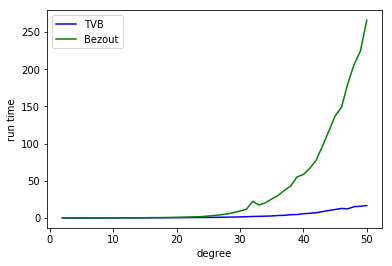

In [8]:
plt.plot(domain, TVB_times, 'b-', label="TVB")
plt.plot(domain, np.array(Bezout_times), 'g-', label="Bezout")
plt.legend(loc="upper left")
plt.xlabel("degree")
plt.ylabel("run time")

plt.show()
#plt.savefig('TvB-vs-Bezout2d.pdf')